# Tutorial 3 - Calculating weather indicators

In this tutorial, you will apply what you've learned in the previous 2 tutorials, to calculate weather indicators for separate NUTS regions and visualize those results. 

#### Exercise 1 

Import the NUTS data into a GeoPandas GeoDataframe and filter out only the NUTS level 2 regions for the Netherlands.  
Plot the results. 

In [ ]:
# Insert code for exercise 1 here
import xarray as xr
import geopandas as gpd

ds = xr.open_dataset('../week4/b5c10f86b559a6be87c5982677502579.nc', engine='netcdf4')


gdf = gpd.read_file('../week5/data/NUTS_RG_10M_2024_4326.geojson')


gdf[(gdf["LEVL_CODE"] == 2) & (gdf["CNTR_CODE"] == "NL")]




,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
973,NL112,3,NL,Delfzijl en omgeving,Delfzijl en omgeving,NaN,2.0,1.0,"POLYGON ((7.08811 53.25449, 6.91151 53.24297, ..."
974,NL114,3,NL,Oost-Groningen,Oost-Groningen,NaN,2.0,1.0,"POLYGON ((7.20894 53.24306, 7.20279 53.11328, ..."
975,NL115,3,NL,Overig Groningen,Overig Groningen,NaN,2.0,1.0,"MULTIPOLYGON (((6.77705 53.40478, 6.63299 53.3..."
976,NL126,3,NL,Zuidoost-Friesland,Zuidoost-Friesland,NaN,2.0,1.0,"POLYGON ((6.31524 53.09405, 6.41637 52.97676, ..."
977,NL127,3,NL,Noord-Friesland,Noord-Friesland,NaN,2.0,1.0,"MULTIPOLYGON (((6.01297 53.15164, 5.79639 53.0..."
978,NL128,3,NL,Zuidwest-Friesland,Zuidwest-Friesland,NaN,2.0,1.0,"POLYGON ((5.41123 53.15172, 5.74738 53.12091, ..."
979,NL131,3,NL,Noord-Drenthe,Noord-Drenthe,NaN,2.0,1.0,"POLYGON ((6.9357 52.99336, 6.74049 52.95247, 6..."
980,NL132,3,NL,Zuidoost-Drenthe,Zuidoost-Drenthe,NaN,2.0,NaN,"POLYGON ((7.09269 52.8382, 7.05314 52.65694, 7..."
981,NL133,3,NL,Zuidwest-Drenthe,Zuidwest-Drenthe,NaN,2.0,NaN,"POLYGON ((6.62943 52.66966, 6.54178 52.65842, ..."
982,NL211,3,NL,Noord-Overijssel,Noord-Overijssel,NaN,2.0,NaN,"POLYGON ((5.81983 52.81732, 5.87665 52.80699, ..."


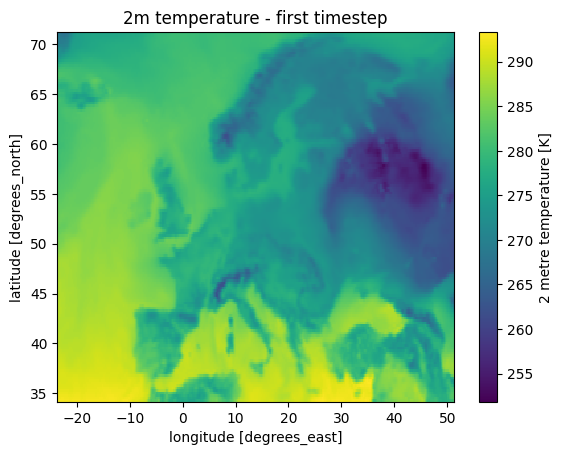

In [42]:
import matplotlib.pyplot as plt


ds['t2m'].isel(valid_time=0).plot()
plt.title("2m temperature - first timestep")
plt.show()

<Axes: >

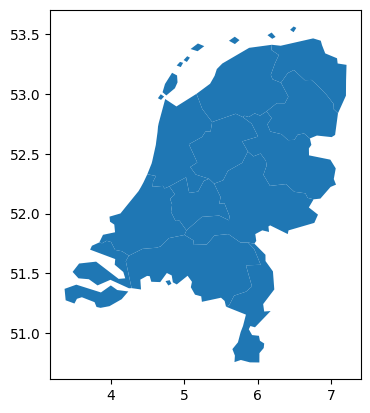

In [36]:
gdf_nl_only = gdf[(gdf["CNTR_CODE"] == "NL") & (gdf["LEVL_CODE"] == 2)].copy()

gdf_nl_only[["geometry"]].plot()




In [45]:

# check that the crs of two dataframes are correct. 
print(gdf.crs)
print(ds.rio.crs)


EPSG:4326
EPSG:4326


/var/folders/nz/8hytv3m15990fk2cjvkvkxpc0000gn/T/ipykernel_44397/552749482.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


<Axes: >

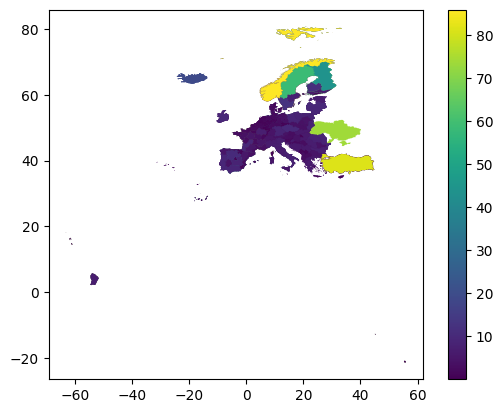

In [48]:
gdf["area"] = gdf.area

gdf.plot("area", legend=True)



In [30]:
gdf['boundary'] = gdf.boundary

#### Exercise 2
In this exercise, we would like to determine the average temperature for December 2022 for each NUTS-2 region in the Netherlands. To do so, take the following steps:
1. Create a for-loop over all NUTS-2 regions in the Netherlands.
2. For each NUTS-2 region, import the clipped NetCDF file containing all data for the specific region that you created in Tutorial 2. 
3. Calculate the mean air temperature at 2 metres above the Earth's surface over time for the considered region.
4. Store this in the geopandas file with the NUTS-2 data, in the column 't2m-avg'

After running the for-loop, plot a figure, showing the average temperature in Dec. 2022 for each NUTS-2 region in the Netherlands. This can be done using the plot function of Geopandas. Make sure it contains a legend, which is projected horizontally.

In [2]:
# Insert code for exercise 2 here

#### Exercise 3 - Plot the "t2m_avg" for the Netherlands for 2 days
Similar to the example above, calculate the "t2m" average value, except now only for 2 days: December 1st, 2022 and December 2nd, 2022, separately.   
Plot the result using the subplot function of matplotlib. Make sure the figure is neat and easily understandable with clear titles and a legend that is easily comparable between the two subplots. Check the documentation of Matplotlib or Geopandas.plot. 

In [3]:
# Insert code for exercise 3 here

#### Exercise 4 - Plot the maximum t2m for the Netherlands regions in December 2022
Calculate the maximum temperature 2 metres above Earth'surface, i.e. the "t2m" max value for December 2022 for each NUTS-2 region in the Netherlands. Plot the result.

In [4]:
# Insert code for exercise 4 here